In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import pandas as pd
import torch
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
data_dir = Path("./../data")
df = pd.read_csv(data_dir.joinpath("./adult_train.csv"))
test = pd.read_csv(data_dir.joinpath("./adult_test.csv"))
test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [18]:
num_cols = list(df.select_dtypes("number"))
target_col = ["income_bracket"]


In [19]:
num_cols = list(df.select_dtypes("number"))
target_col = ["income_bracket"]
cat_cols = list(set(list(df.columns)).difference(set(num_cols+target_col)))
total_cols = num_cols + target_col
data = df[total_cols]
y = df[target_col]
numX = df[num_cols]
catX = df[cat_cols]


In [20]:
catX

,gender,occupation,education,relationship,workclass,marital_status,race,native_country
0,Male,Adm-clerical,Bachelors,Not-in-family,State-gov,Never-married,White,United-States
1,Male,Exec-managerial,Bachelors,Husband,Self-emp-not-inc,Married-civ-spouse,White,United-States
2,Male,Handlers-cleaners,HS-grad,Not-in-family,Private,Divorced,White,United-States
3,Male,Handlers-cleaners,11th,Husband,Private,Married-civ-spouse,Black,United-States
4,Female,Prof-specialty,Bachelors,Wife,Private,Married-civ-spouse,Black,Cuba
...,...,...,...,...,...,...,...,...
32556,Female,Tech-support,Assoc-acdm,Wife,Private,Married-civ-spouse,White,United-States
32557,Male,Machine-op-inspct,HS-grad,Husband,Private,Married-civ-spouse,White,United-States
32558,Female,Adm-clerical,HS-grad,Unmarried,Private,Widowed,White,United-States
32559,Male,Adm-clerical,HS-grad,Own-child,Private,Never-married,White,United-States


In [21]:
from ndf import make_category_list

In [22]:
from ndf import TabularNumCatDataset

In [23]:
from torch.utils.data import DataLoader
cat_cols = list(catX)
cat_list = make_category_list(catX, cat_cols)
        
dataset = TabularNumCatDataset(numX , catX , y,cat_list)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
num_tensor ,cat_tensor , y_tensor = next(iter(dataloader))

/home/advice/miniconda3/envs/ndf/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from ndf import Numeric , TabularLayer
num_info = Numeric(input_dim = numX.shape[1], output_dim = 10 , activation="relu",last_logit=True , layers=[25])
tabularLayer = TabularLayer(num_info , cat_list)

In [25]:
from ndf import FeedForward , NeuralDecisionForest ,Forest

feature_layer = tabularLayer
feature_dim = tabularLayer.output_dim
forest_param = dict(
    n_tree=5, tree_depth=3, n_in_feature=feature_dim, tree_feature_rate=0.5, n_class=2, jointly_training=True
)
forest = Forest(**forest_param)
nnForest = NeuralDecisionForest(feature_layer=feature_layer, forest=forest)

In [26]:
def prepare_optim(model, lr):
    params = [p for p in model.parameters() if p.requires_grad]
    return torch.optim.Adam(params, lr=lr, weight_decay=1e-5)

In [27]:
from sklearn.preprocessing import LabelEncoder
import numpy as np 

In [28]:
dataset = TabularNumCatDataset(numX , catX , y,cat_list)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [29]:

optim = prepare_optim(nnForest, 1e-3)

In [30]:
from ndf import ClassificationMetric

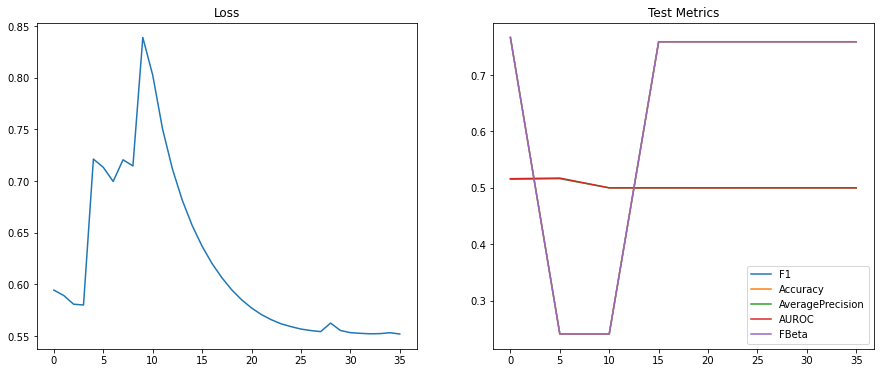

In [34]:
import torchmetrics 
import matplotlib.pyplot as plt 
from IPython.display import clear_output
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from pathlib import Path
def train(model, optim, dataset, **kwargs):
    Loss_Collection = dict(train=[], test=[], loss=[])
    metric = torchmetrics.F1()
    metrics = ClassificationMetric(metric_kwargs=dict(num_classes=2))
    save_dir = kwargs.get("save_dir", "./")
    BEST_LOSS = np.inf
    for epoch in range(0, kwargs.get("n_epoch", 100)):
        model.train()
        trainloader = DataLoader(dataset, batch_size=kwargs.get("batch_size", 32), shuffle=kwargs.get("shuffle", True))
        Loss = []
        metric.reset()
        for batch_idx, (*batch_x, batch_y) in enumerate(trainloader):
            output = model(batch_x)
            optim.zero_grad()
            loss = F.nll_loss(torch.log(output), batch_y.squeeze().long())
            loss.backward()
            optim.step()
            Loss.append(loss.detach().numpy())
            metric(output, batch_y.squeeze().long())
        else:
            f1 = metric.compute()
            Loss_Collection["loss"].append(np.mean(Loss))
            Loss_Collection["train"].append(f1 * 100)
            if BEST_LOSS > np.mean(Loss):
                BEST_LOSS = np.mean(Loss)
                model.save(save_dir.joinpath("./model.pt"))
                torch.save(optim.state_dict(), save_dir.joinpath("./optim.pt"))

        if epoch % kwargs.get("n_log", 5) == 0:
            clear_output(wait=True)
            evalloader = DataLoader(dataset, batch_size=kwargs.get("batch_size", 32), shuffle=False)

            metric.reset()
            model.eval()
            metrics.reset()
            for batch_idx, (*batch_x, batch_y) in enumerate(evalloader):
                output = model(batch_x)
                metric(output, batch_y.squeeze().long())
                metrics.update(output, batch_y.squeeze().long())
            else:
                result = metrics.compute()
                metrics.log(result)
                f1 = metric.compute()
            Loss_Collection["test"].append(f1 * 100)
            fig, ax = plt.subplots(1, 2, figsize=(15, 6))
            axes = ax.flatten()
            logs_iter = [i * kwargs.get("n_log", 5) for i in range(len(Loss_Collection["test"]))]
            axes[0].plot(Loss_Collection["loss"])
            for metric_name, value in metrics.history.items():
                axes[1].plot(logs_iter, value, label=metric_name)
            # axes[1].plot(Loss_Collection["train"],label="train")
            # axes[1].plot(logs_iter,  Loss_Collection["test"],label = "test")
            axes[0].set_title("Loss")
            title = f"{type(metric).__name__} train best : {np.max(Loss_Collection['train']):.2f} test best : {np.max(Loss_Collection['test']):.2f}"
            axes[1].set_title("Test Metrics")
            plt.legend()
            plt.show()


save_dir = Path("./../model_v2")
save_dir.mkdir(exist_ok=True)
try :
    nnForest.load(save_dir.joinpath("./model.pt"))
    optim.load_state_dict(torch.load(save_dir.joinpath("./optim.pt")))
except :
    pass 
train(nnForest , optim , dataset,batch_size=512,n_epoch=1000,save_dir=save_dir)
        
        